---------------------------------------------------------------------------------------------------------------------------------

##### <span style="color: #FF0000;">Weekly Tasks - Support Vector Machines</span>

##### Tasks:
- Implement SVM classification on the iris dataset using different approaches
- Compare performance between linear and non-linear SVM models

##### Task Details:
1. Linear SVM Implementation:
   - Use LinearSVC to separate virginica from non-virginica
   - Evaluate model performance using standard metrics
   - Experiment with different C values for regularization
   - Analyze decision boundaries and support vectors

2. Non-linear SVM Exploration:
   - Implement polynomial kernel SVM
   - Test different kernel options (polynomial, RBF)
   - Compare performance with linear SVM
   - Visualize decision boundaries for different kernels

3. Multi-class Classification (Optional):
   - Extend the implementation to classify all three iris species
   - Compare one-vs-rest and one-vs-one approaches
   - Evaluate overall model performance
   - Analyze confusion matrix for insights

##### Data Preparation Note:
For details on the data preparation process, please refer to the data folder at **SVM\Weekly Tasks\data**. The iris dataset will be used for this analysis, which contains measurements for 150 iris flowers from three different species. Each record includes four features: sepal length, sepal width, petal length, and petal width. This dataset is ideal for demonstrating SVM concepts as it provides clear opportunities to explore both linear and non-linear classification scenarios.

##### <span style="color: #1E90FF;">[Click here to jump to the main solution](#model-development-and-evaluation)</span>

---------------------------------------------------------------------------------------------------------------------------------

In [1]:
# Install required libraries
%pip install pandas numpy matplotlib seaborn scikit-learn wordcloud xgboost statsmodels 
%pip install shap lime 

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


---------------------------------------------------------------------------------------------------------------------------------

##### <span style="color: #FF0000;">Import Required Libraries</span>
##### This code imports the required libraries for data manipulation, visualization, and machine learning tasks.

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline


from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

import sys

assert sys.version_info >= (3, 7)

import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
# Set random seed for reproducibility
np.random.seed(42)

# Configure plot settings
plt.rcParams['figure.figsize'] = (10, 6)

---------------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------------

### Model Building-Main

In [3]:
# Load iris dataset
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)  # Virginica vs non-Virginica

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
def train_and_evaluate_svm(C_values):
    results = []
    for C in C_values:
        # Create pipeline with scaling and SVM
        svm_clf = make_pipeline(
            StandardScaler(),
            LinearSVC(C=C, random_state=42)
        )
        
        # Train the model
        svm_clf.fit(X_train, y_train)
        
        # Make predictions
        y_pred = svm_clf.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        results.append({
            'C': C,
            'accuracy': accuracy,
            'model': svm_clf
        })
        
        print(f"\nResults for C={C}:")
        print(f"Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        
    return results

# Test different C values
C_values = [0.001, 0.01,  0.1, 1.0, 10.0, 100.0]
model_results = train_and_evaluate_svm(C_values)


Results for C=0.001:
Accuracy: 0.8667

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.79      0.88        19
        True       0.73      1.00      0.85        11

    accuracy                           0.87        30
   macro avg       0.87      0.89      0.86        30
weighted avg       0.90      0.87      0.87        30


Results for C=0.01:
Accuracy: 0.9000

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.84      0.91        19
        True       0.79      1.00      0.88        11

    accuracy                           0.90        30
   macro avg       0.89      0.92      0.90        30
weighted avg       0.92      0.90      0.90        30


Results for C=0.1:
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        19
        True       1.00      1.00      1.00        

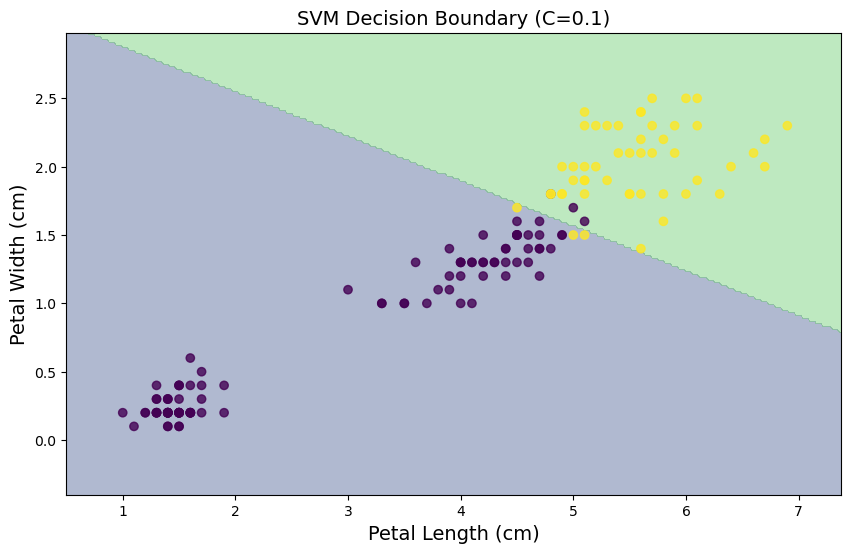

In [5]:
def plot_decision_boundary(model, X, y, title):
    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Make predictions on mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.title(title)
    plt.show()

# Plot decision boundaries for best model
best_model = max(model_results, key=lambda x: x['accuracy'])
plot_decision_boundary(best_model['model'], X, y, 
                      f"SVM Decision Boundary (C={best_model['C']})")

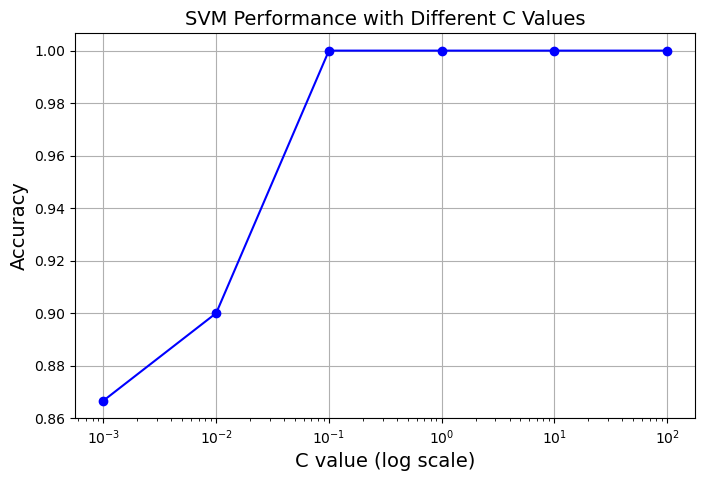

In [6]:
# Plot accuracy comparison
plt.figure(figsize=(8, 5))
C_values = [result['C'] for result in model_results]
accuracies = [result['accuracy'] for result in model_results]
plt.semilogx(C_values, accuracies, 'bo-')
plt.xlabel('C value (log scale)')
plt.ylabel('Accuracy')
plt.title('SVM Performance with Different C Values')
plt.grid(True)
plt.show()